In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

In [14]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/gdrive/MyDrive/Datasets/archive/train",
                                                               image_size=(224, 224),
                                                              batch_size=32,
                                                              label_mode="categorical")
val_dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/gdrive/MyDrive/Datasets/archive/validation",
                                                              image_size=(224, 224),
                                                              batch_size=32,
                                                              label_mode="categorical")
test_dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/gdrive/MyDrive/Datasets/archive/test",
                                                              image_size=(224, 224),
                                                              batch_size=32,
                                                              label_mode="categorical")

Found 1244 files belonging to 25 classes.
Found 243 files belonging to 25 classes.
Found 249 files belonging to 25 classes.


In [4]:
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(len(train_dataset.class_names),activation='softmax'))

model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [5]:
fitted_model = model.fit(train_dataset,
                    epochs= 10,
                    validation_data=val_dataset)

Epoch 1/10
39/39 [==============================] - 39s 735ms/step - loss: 13.1504 - accuracy: 0.1793 - val_loss: 183.0270 - val_accuracy: 0.0412
Epoch 2/10
39/39 [==============================] - 34s 701ms/step - loss: 7.2097 - accuracy: 0.4092 - val_loss: 37.8773 - val_accuracy: 0.1934
Epoch 3/10
39/39 [==============================] - 35s 708ms/step - loss: 3.1365 - accuracy: 0.5900 - val_loss: 19.1541 - val_accuracy: 0.3539
Epoch 4/10
39/39 [==============================] - 35s 703ms/step - loss: 1.8576 - accuracy: 0.7235 - val_loss: 21.5490 - val_accuracy: 0.2593
Epoch 5/10
39/39 [==============================] - 34s 701ms/step - loss: 1.3578 - accuracy: 0.8047 - val_loss: 4.9542 - val_accuracy: 0.7119
Epoch 6/10
39/39 [==============================] - 35s 708ms/step - loss: 0.9938 - accuracy: 0.8545 - val_loss: 7.0035 - val_accuracy: 0.6173
Epoch 7/10
39/39 [==============================] - 34s 700ms/step - loss: 0.7376 - accuracy: 0.9076 - val_loss: 4.3771 - val_accuracy: 

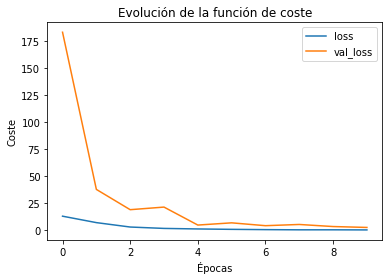

In [11]:
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title("Evolución de la función de coste")
plt.ylabel("Coste")
plt.xlabel('Épocas')
plt.legend(["loss", "val_loss"])
plt.show()

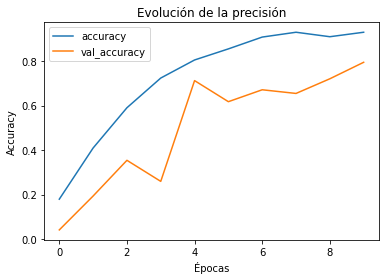

In [12]:
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title("Evolución de la precisión")
plt.ylabel("Accuracy")
plt.xlabel('Épocas')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [15]:
model.evaluate(test_dataset)

8/8 [==============================] - 30s 141ms/step - loss: 2.6890 - accuracy: 0.7992


[2.6889827251434326, 0.7991967797279358]

Found 9 files belonging to 10 classes.
['Banana', 'Kiwi', 'Manzana', 'Pepino', 'Pera', 'Pimenton', 'Sandia', 'Tomate', 'Zanahoria']


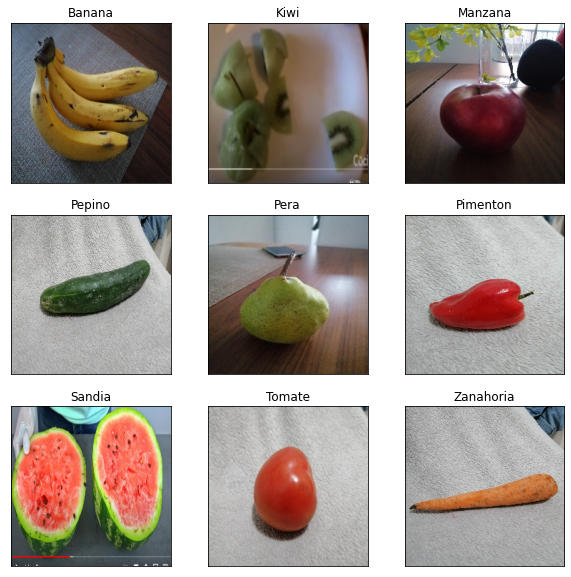

In [8]:
photo_dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/gdrive/MyDrive/Datasets/Fotos",
                                                              shuffle=False,
                                                              image_size=(224, 224),
                                                              batch_size=32,
                                                              label_mode="categorical")

plt.figure(figsize=(10, 10))
for images, labels in photo_dataset.take(1):
    photo_dataset.class_names.remove('.ipynb_checkpoints')
    print(photo_dataset.class_names)
    for i in range(len(photo_dataset.class_names)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(photo_dataset.class_names[i])
        plt.xticks([])
        plt.yticks([])

In [16]:
pred = model.predict(photo_dataset, verbose=1)
for i in range(len(pred)):
  print(i,train_dataset.class_names[np.argmax(pred[i])])


1/1 [==============================] - 1s 637ms/step
0 banana
1 pear
2 eggplant
3 jalepeno
4 pineapple
5 chilli pepper
6 mango
7 jalepeno
8 cucumber


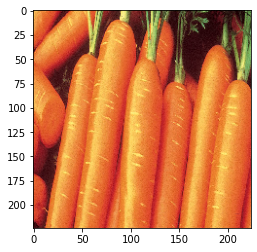

carrot


In [17]:
img = image.load_img("/content/gdrive/MyDrive/Datasets/archive/test/carrot/Image_8.jpg", target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print(train_dataset.class_names[np.argmax(pred)])